In [ ]:
# TA-2 : Implementasi Regresi Linear pada Studi Kasus Pilihan dengan Aplikasi Web Flask
# Studi Kasus: Prediksi Nilai Ujian Berdasarkan Jam Belajar

# Step 1: Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib


In [ ]:
df = pd.read_csv("student_scores.xls")

print("--- 5 Baris Pertama ---")
display(df.head())

print("\n--- Nama Kolom ---")
print(df.columns)


--- 5 Baris Pertama ---


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



--- Nama Kolom ---
Index(['Hours', 'Scores'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


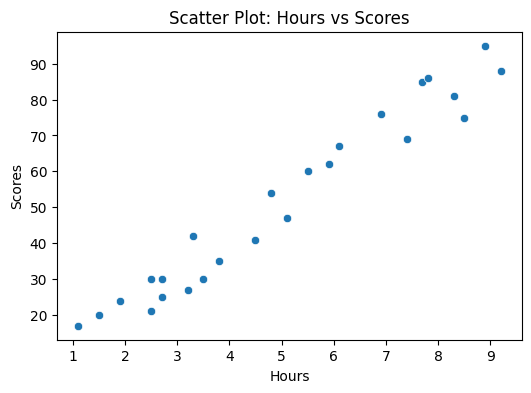

In [6]:
# Info data
print(df.info())

# Statistik deskriptif
print(df.describe())

# Scatter plot untuk melihat hubungan
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours", y="Scores", data=df)
plt.title("Scatter Plot: Hours vs Scores")
plt.show()


In [7]:
# Cek missing values
print("Jumlah Missing Value:\n", df.isnull().sum())

# Variabel X dan y
X = df[["Hours"]]
y = df["Scores"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


Jumlah Missing Value:
 Hours     0
Scores    0
dtype: int64


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Koefisien (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 Score:", r2)
print("RMSE:", rmse)


Koefisien (Slope): 9.682078154455697
Intercept: 2.826892353899737
R^2 Score: 0.9678055545167994
RMSE: 4.352380006653288


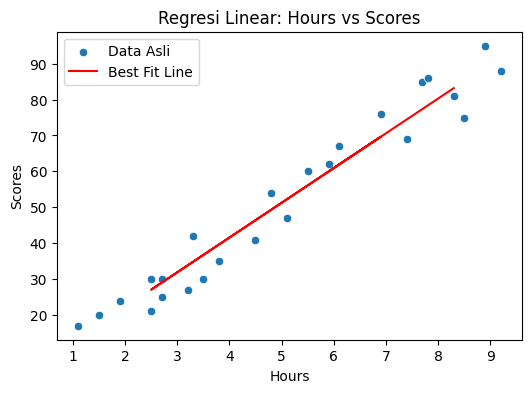

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours", y="Scores", data=df, label="Data Asli")
plt.plot(X_test, y_pred, color="red", label="Best Fit Line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regresi Linear: Hours vs Scores")
plt.legend()
plt.show()


In [10]:
joblib.dump(model, "linear_model.pkl")
print("Model disimpan sebagai linear_model.pkl")


Model disimpan sebagai linear_model.pkl


In [14]:
# Contoh prediksi nilai ujian jika belajar 5 jam
jam_belajar = np.array([[5]])
prediksi_nilai = model.predict(jam_belajar)[0]
print(f"Prediksi nilai ujian untuk {jam_belajar[0][0]} jam belajar: {prediksi_nilai:.2f}")


Prediksi nilai ujian untuk 5 jam belajar: 51.24


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
